<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Basic Libraries & Data</h1>

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data & Overview

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


conclusion:
* <span style="color:Red">There are missing values.</span>
* There are columns we may not need.

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Exploratory Data Analysis</h1>

# Exploratory Data Analysis

In [6]:
# Check if all variables in both data (train, test) are identical except for the response variable ('SalePrice')
(df_train.columns.drop('SalePrice') == df_test.columns).any()

True

In [7]:
# drop 'Id' columns from data train dataframe
df_train.drop(["Id"], axis=1, inplace=True)
# drop 'Id' column from test dataframe and save it in (id_test_list) to use it in submission.
id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [8]:
# Define Numeric and Categorical columns.
numerical_cols = []
categorical_cols = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numerical_cols.append(df_train[col].name)
    else:
        categorical_cols.append(df_train[col].name)

In [9]:
# save numerical and categorigal data in independent dataframes for train and test data.

numerical_df_train = df_train[numerical_cols]
categorical_df_train = df_train[categorical_cols]

numerical_df_test = df_test[numerical_cols[0:-1]]
categorical_df_test = df_test[categorical_cols]

In [10]:
numerical_df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
categorical_df_test.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# EDA with numerical data

## 1. Investigate the distributions.

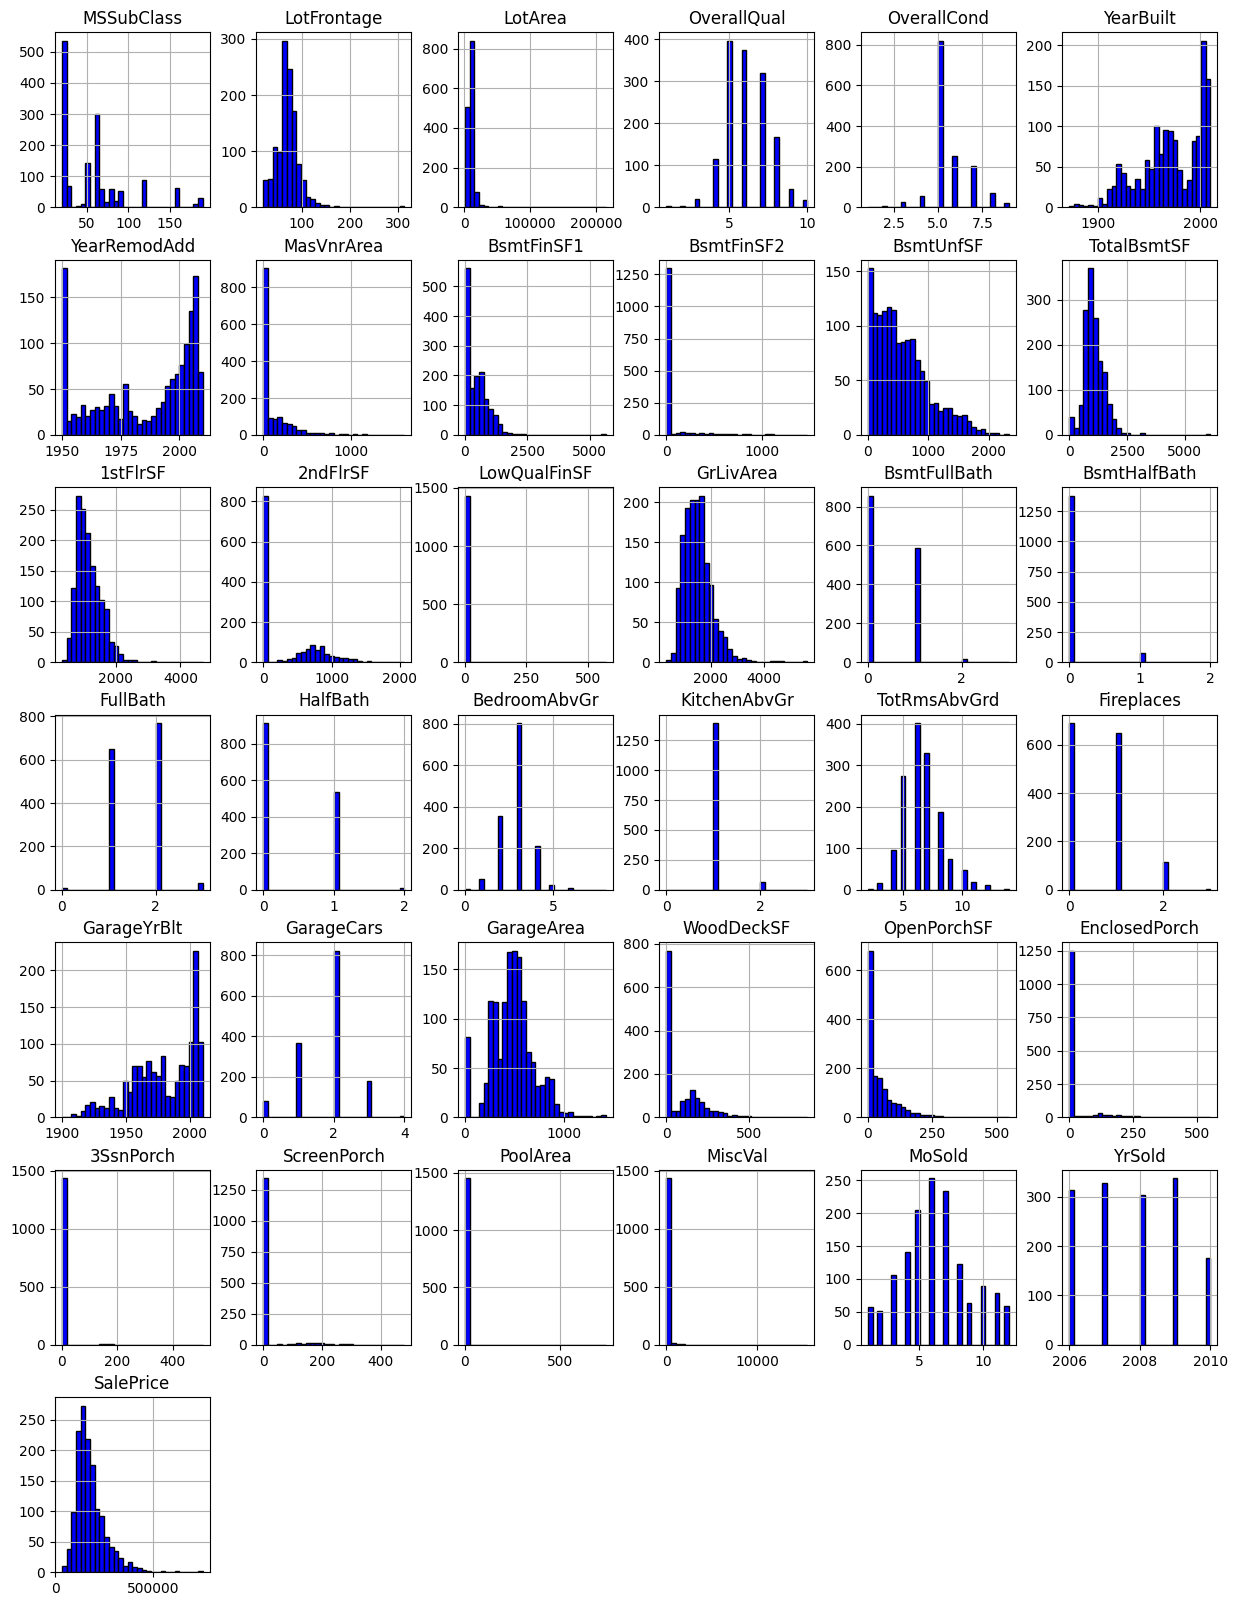

In [12]:
numerical_df_train.hist(figsize=(15,20), bins=30, color='blue', edgecolor='black');

In [13]:
# We notice that there are some columns that center most of their values around a single value
# drop columns with low variance (since they don’t meaningfully contribute to the model’s predictive capability)

from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=0.15)   # column where 85% of the values are constant
data_high_variance = thresholder.fit(numerical_df_train)

In [14]:
numerical_df_train.columns[thresholder.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
# drop column where 85% of the values are constant

high_variance_list = []
for col in numerical_df_train.columns:
    if col not in numerical_df_train.columns[thresholder.get_support()]:
        high_variance_list.append(col)

high_variance_list

['BsmtHalfBath', 'KitchenAbvGr']

In [16]:
df_train.drop(high_variance_list, axis=1, inplace=True)
df_test.drop(high_variance_list, axis=1, inplace=True)

## 2. Investigate the correlations.

<Axes: >

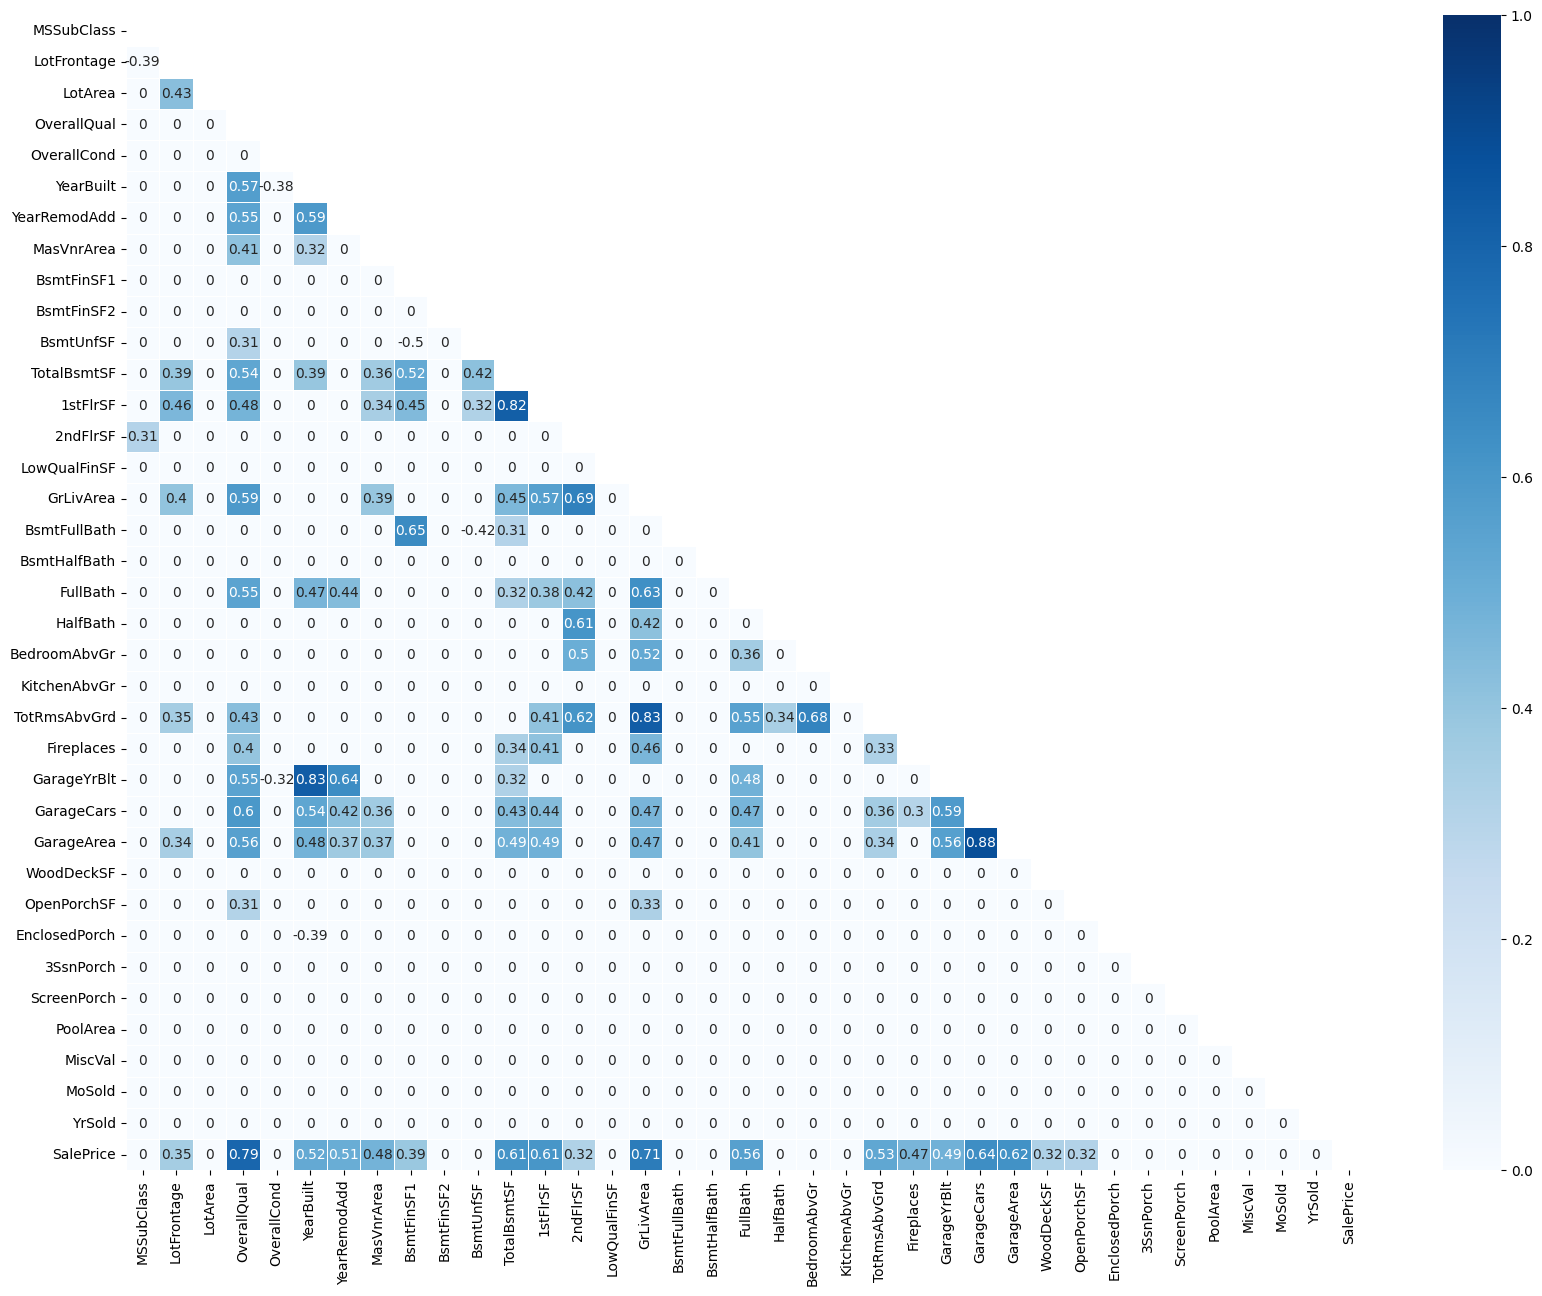

In [17]:
# plot correlation heatmap
plt.figure(figsize = (20,15))

corr_matrix = numerical_df_train.corr()
mask =  np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, annot=True,mask=mask,  linewidths=0.5,cmap='Blues', vmin=0, vmax=1)

In [18]:
# variables that have a low correlation with 'SalePrice' [less than 0.25 or -0.25]
condition  = numerical_df_train.corr()['SalePrice'] < 0.25
condition2 = numerical_df_train.corr()['SalePrice'] > -0.25
low_corr_cols = (numerical_df_train.corr()[condition & condition2]['SalePrice'].index).to_list()
low_corr_cols

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [19]:
# variables that have a high correlation with 'SalePrice'.
high_corr_cols = [elem for elem in (numerical_df_train.columns).to_list() if elem not in low_corr_cols]
high_corr_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [20]:
# drop variables that have a low correlation with 'SalePrice'.
df_train.drop(low_corr_cols, axis=1, inplace=True, errors='ignore')
df_test.drop(low_corr_cols, axis=1, inplace=True, errors='ignore')

c:\Users\tech\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


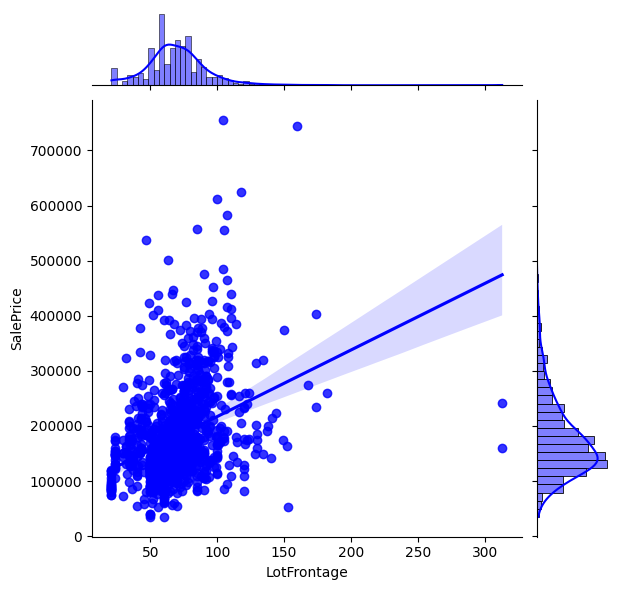

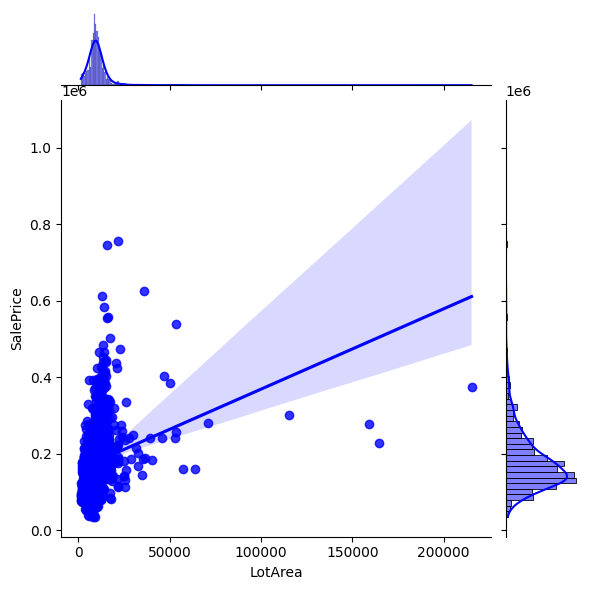

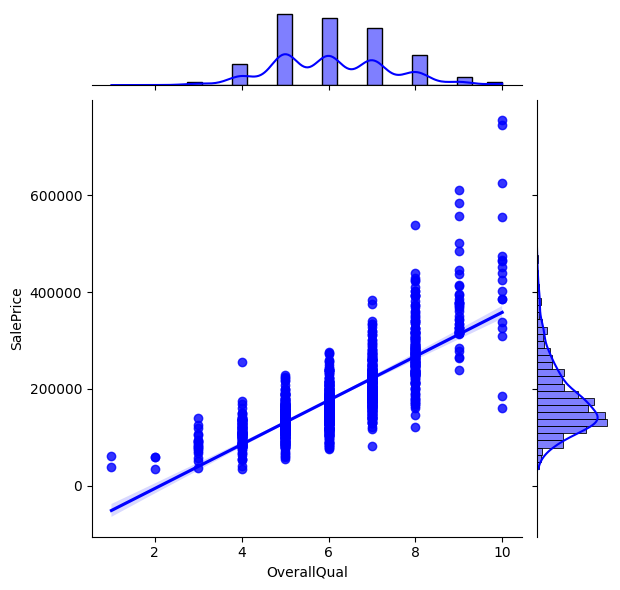

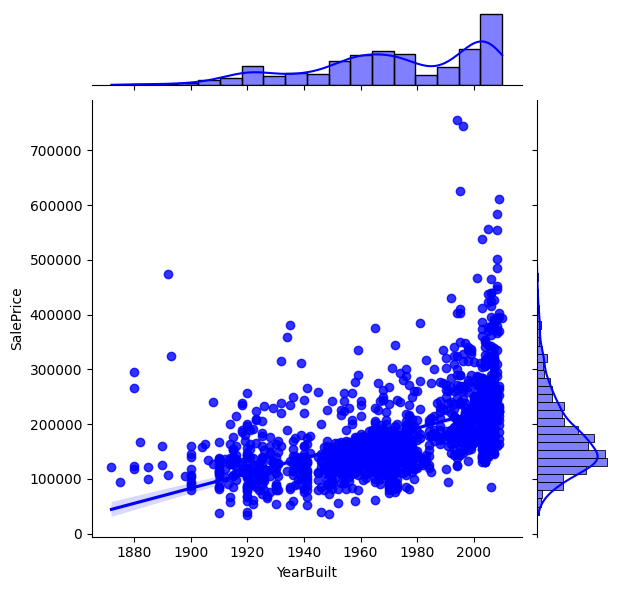

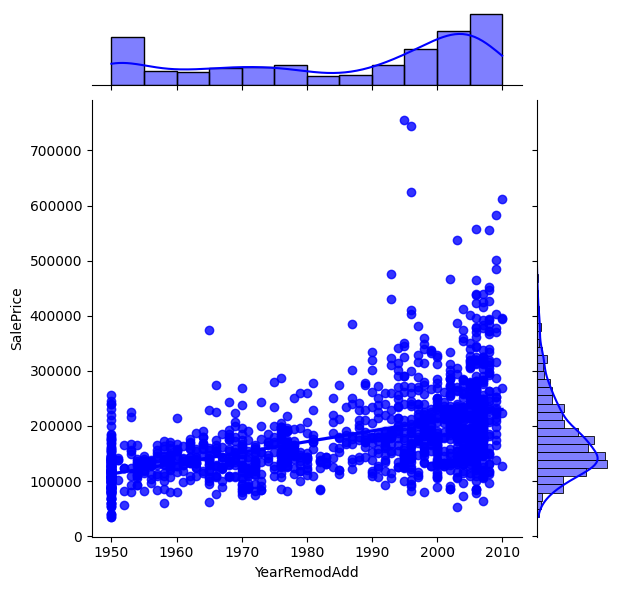

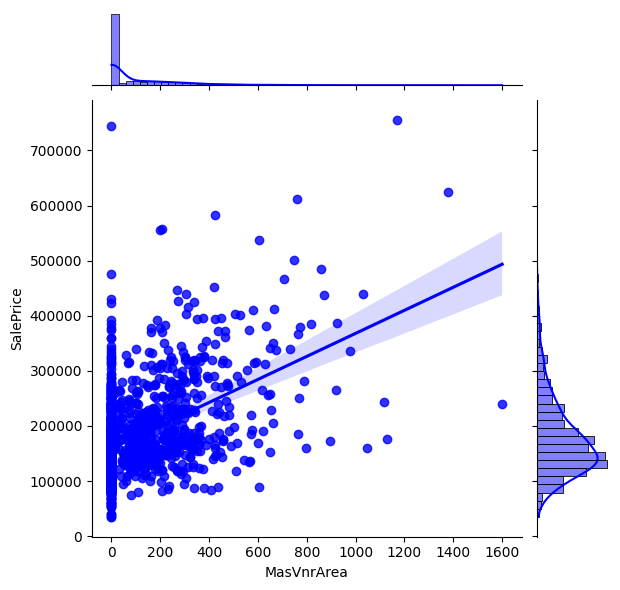

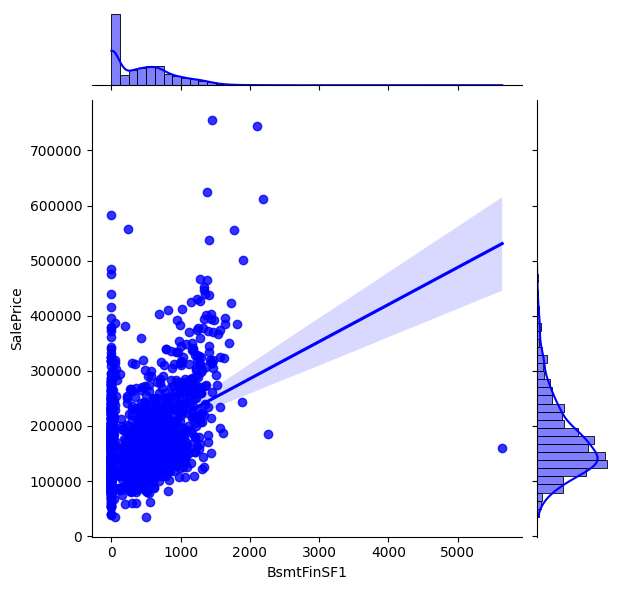

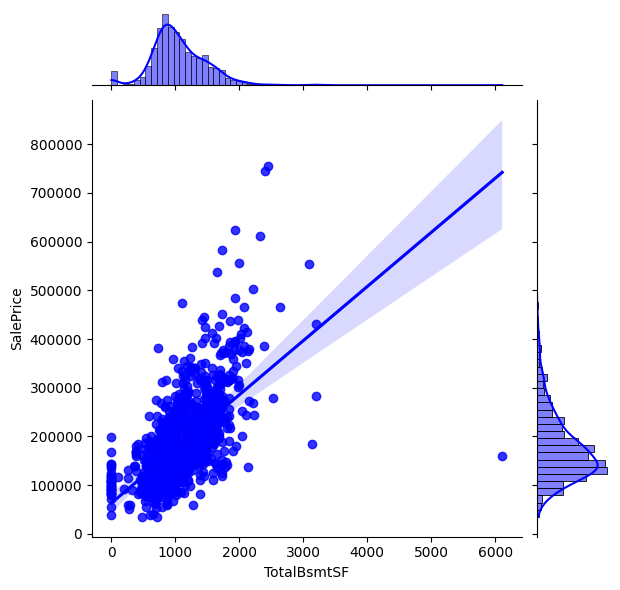

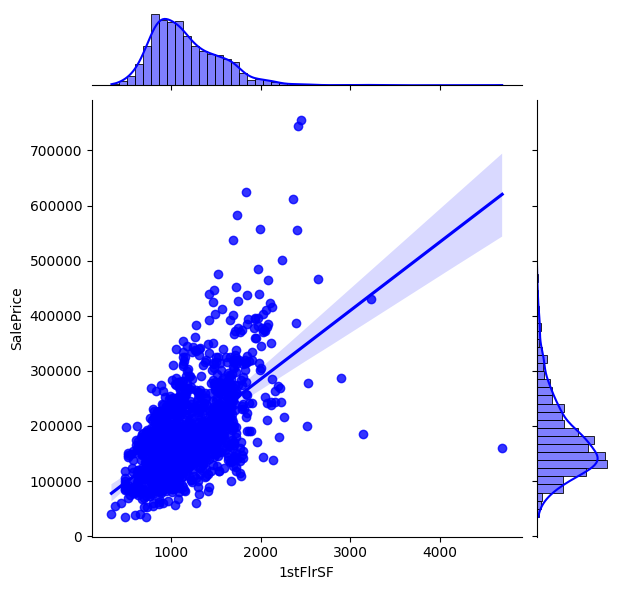

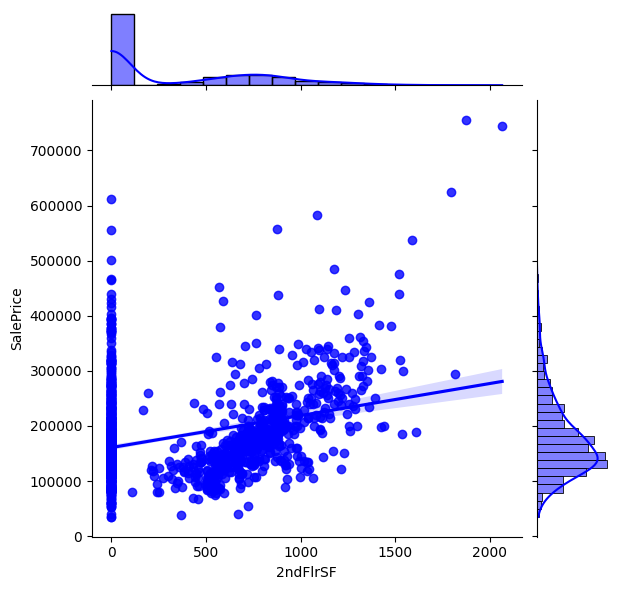

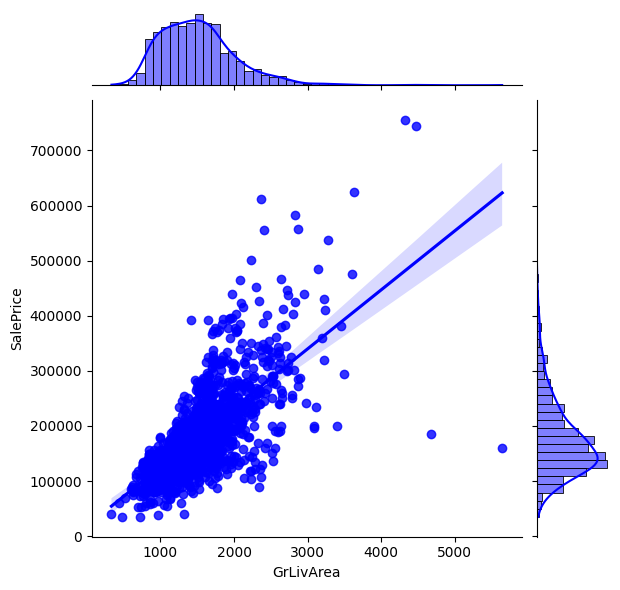

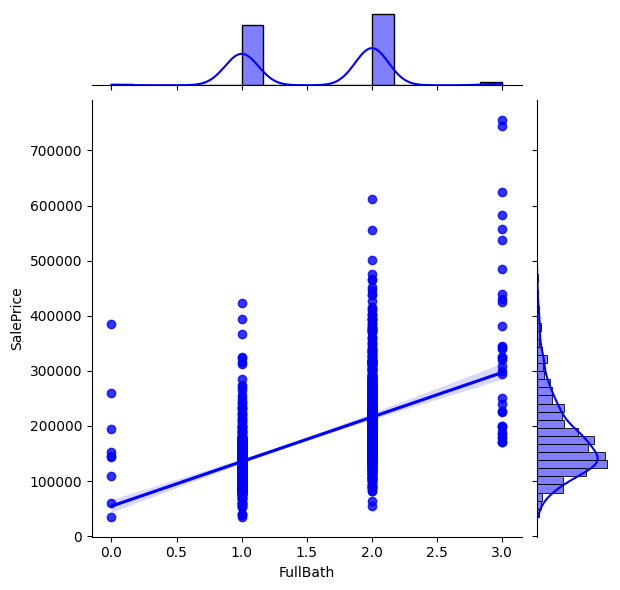

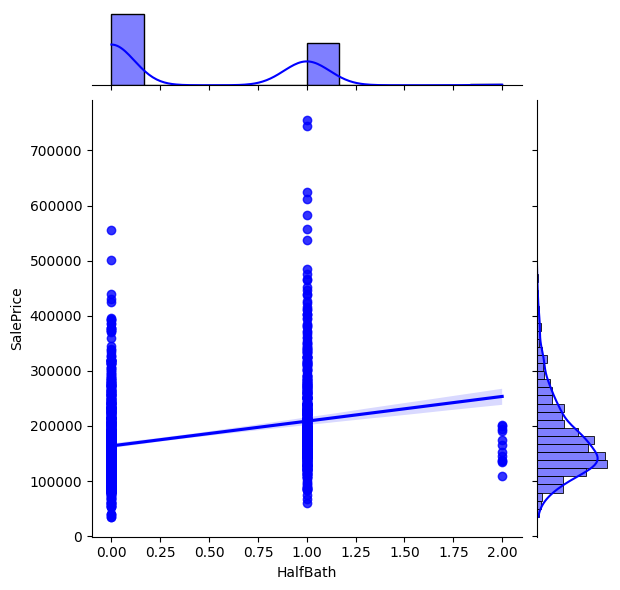

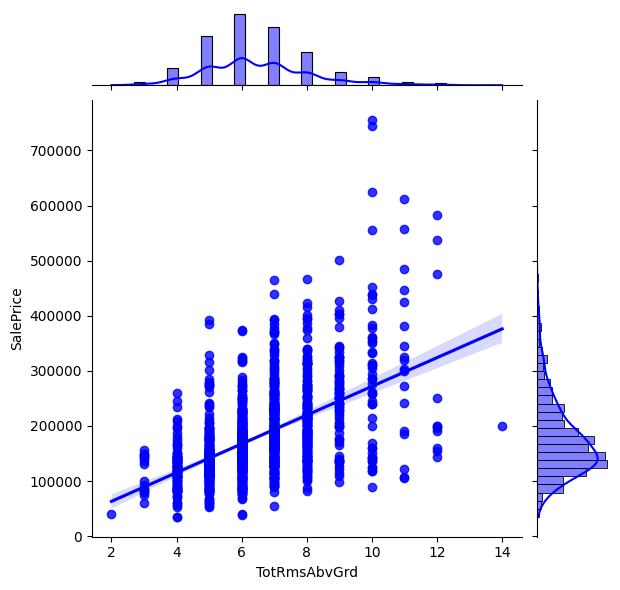

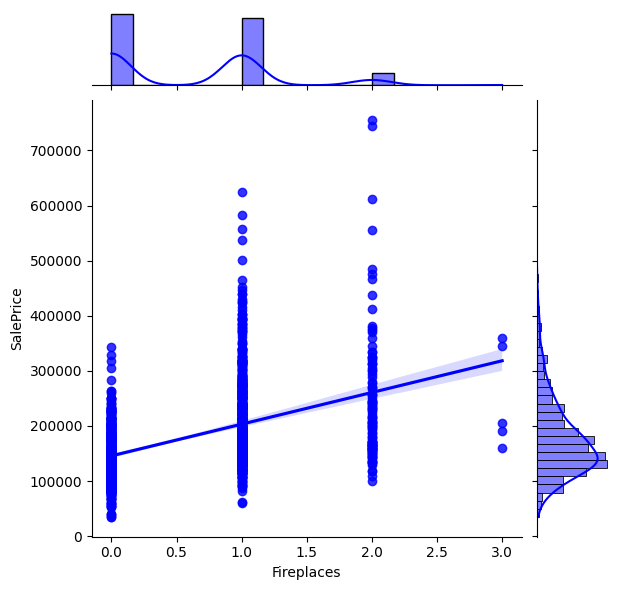

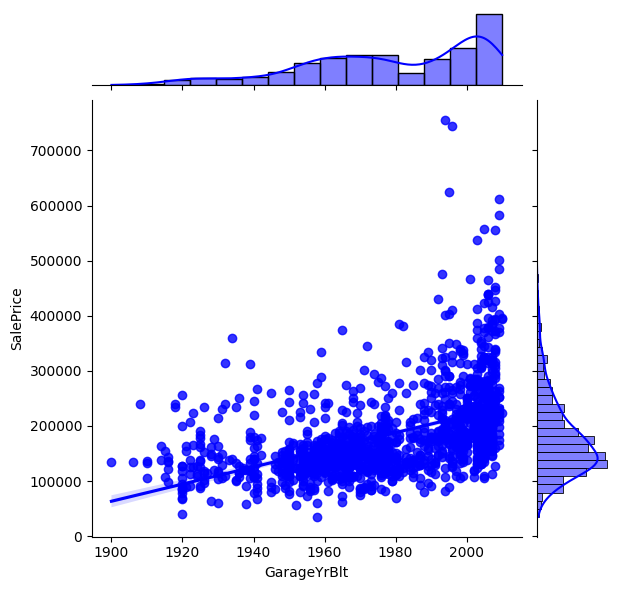

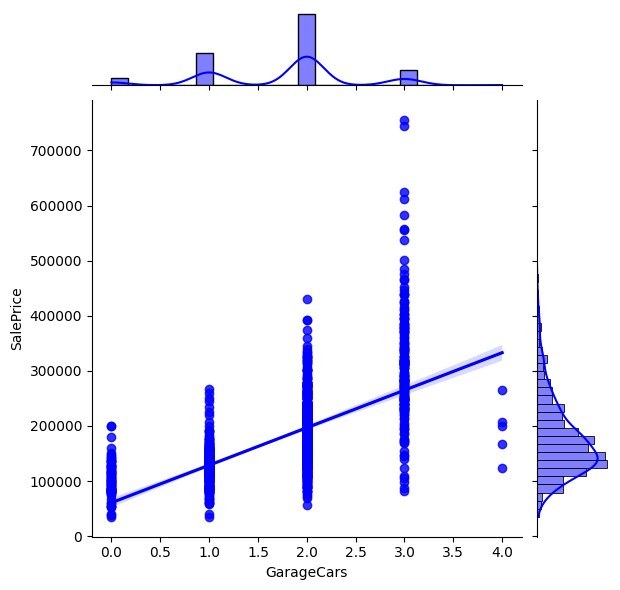

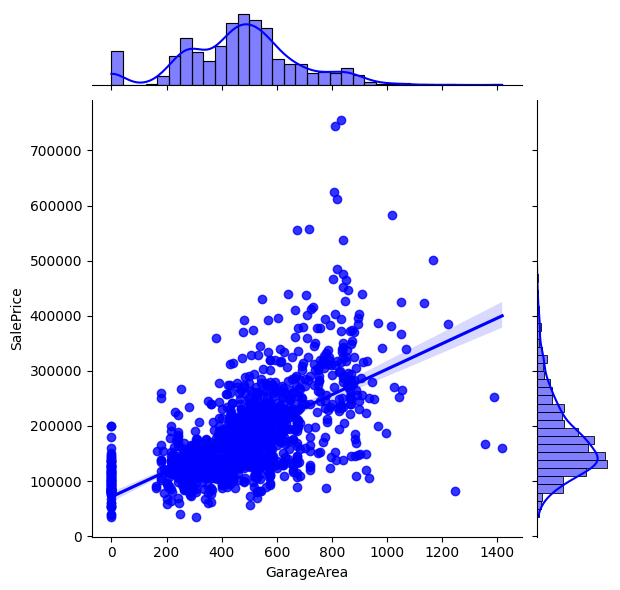

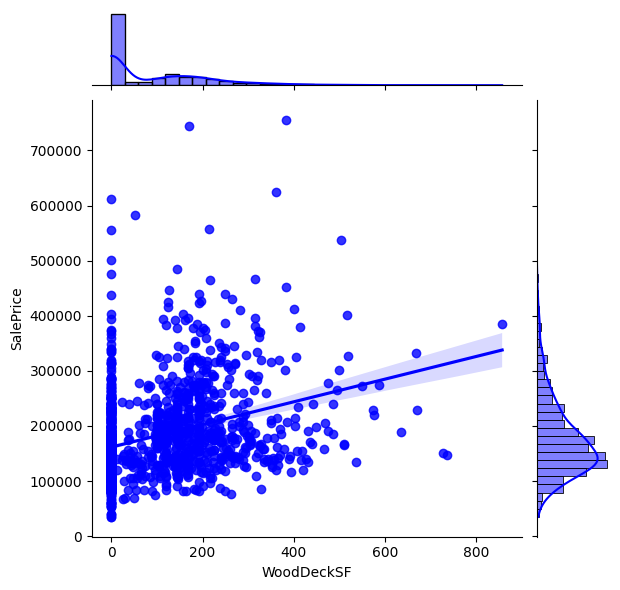

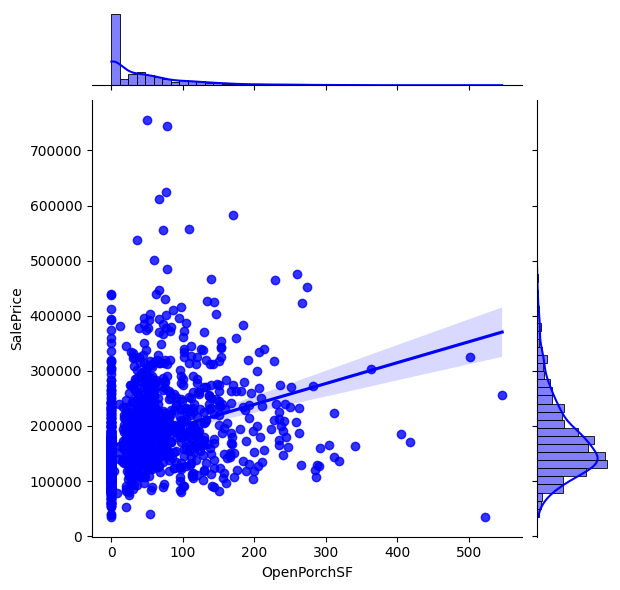

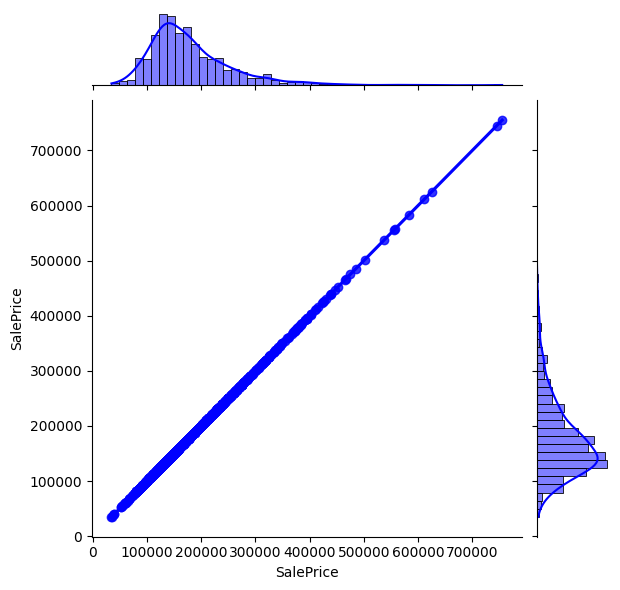

In [21]:
# plot the correlation of each feature with SalePrice (only high correlation feature)
for col in high_corr_cols:
    sns.jointplot(x=numerical_df_train.loc[:,col],y=numerical_df_train.loc[:,'SalePrice'], kind='reg', color='blue');

conclusion:
* <span style="color:Red">There are outlires that must be dealt with, as they may lead to misleading conclusions (This is shown in the scatter charts).</span>
* There are some feather that have a strong correlation with the response variable (SalePrice) and others have a weak correlation.

# EDA with categorical data

In [22]:
# create categorical dataframe and add 'SalePrice' column.
categorical_cols.append('SalePrice')
categorical_df_train = df_train[categorical_cols]
categorical_df_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

## 1. Investigate the distributions.

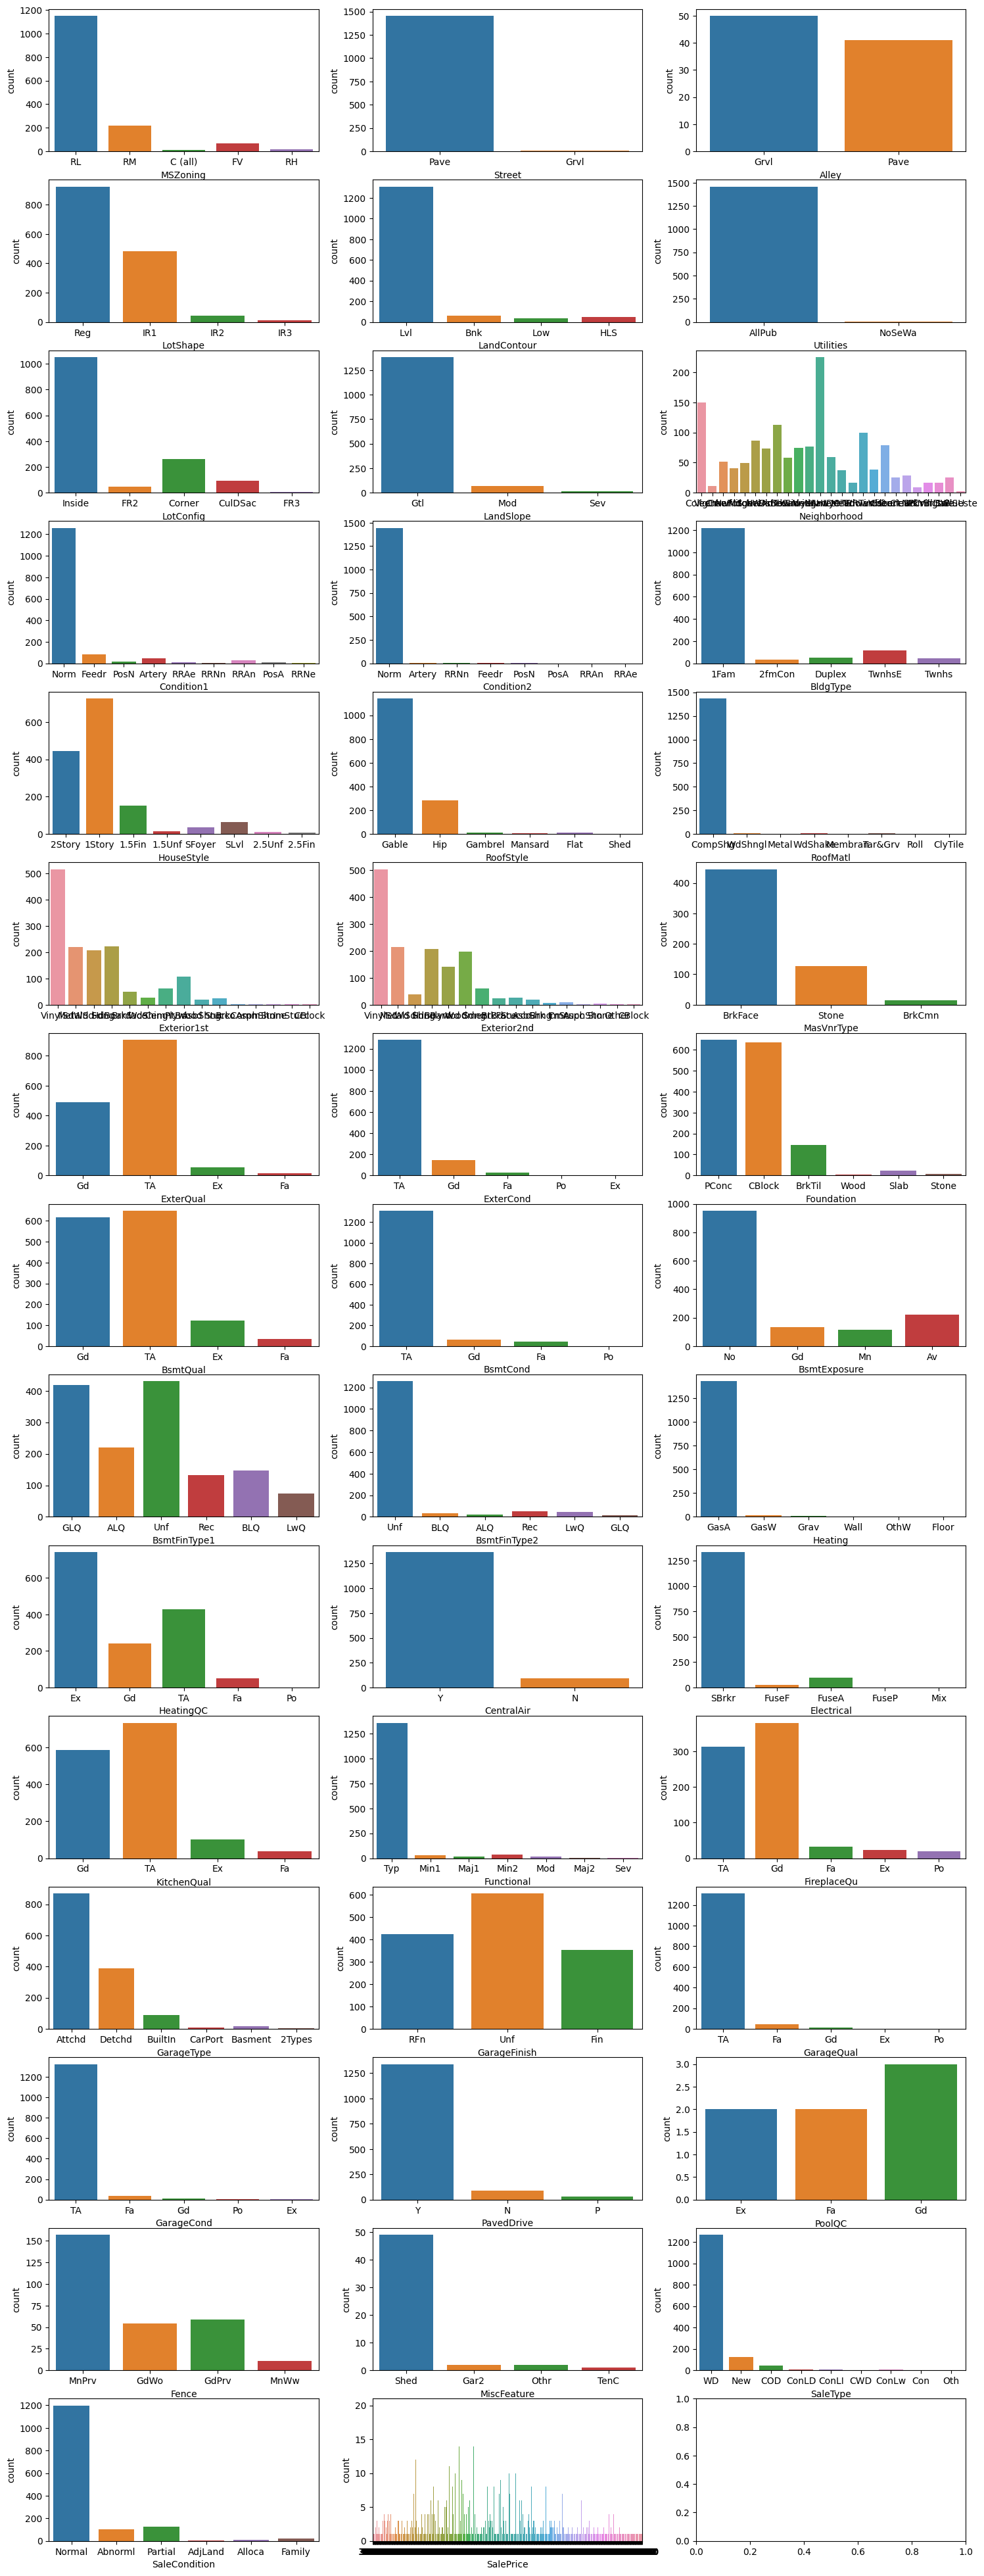

In [23]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in categorical_df_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.countplot(x=categorical_df_train[col], data=categorical_df_train, ax=axes[i,j])
    else:
        sns.countplot(x=categorical_df_train[col], data=categorical_df_train, ax=axes[i,j])
    j += 1

In [24]:
# variables are highly dominated by one feature (more than 90%).

high_dominated_features = []
for col in categorical_df_train.columns:
    if (categorical_df_train[col].value_counts().max()/categorical_df_train[col].count()) > 0.8:
        high_dominated_features.append(col)
        
high_dominated_features

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
df_train.drop(high_dominated_features, axis=1, inplace=True)
df_test.drop(high_dominated_features, axis=1, inplace=True)

## 2. Describe 'SalePrice' with each categorical feature.

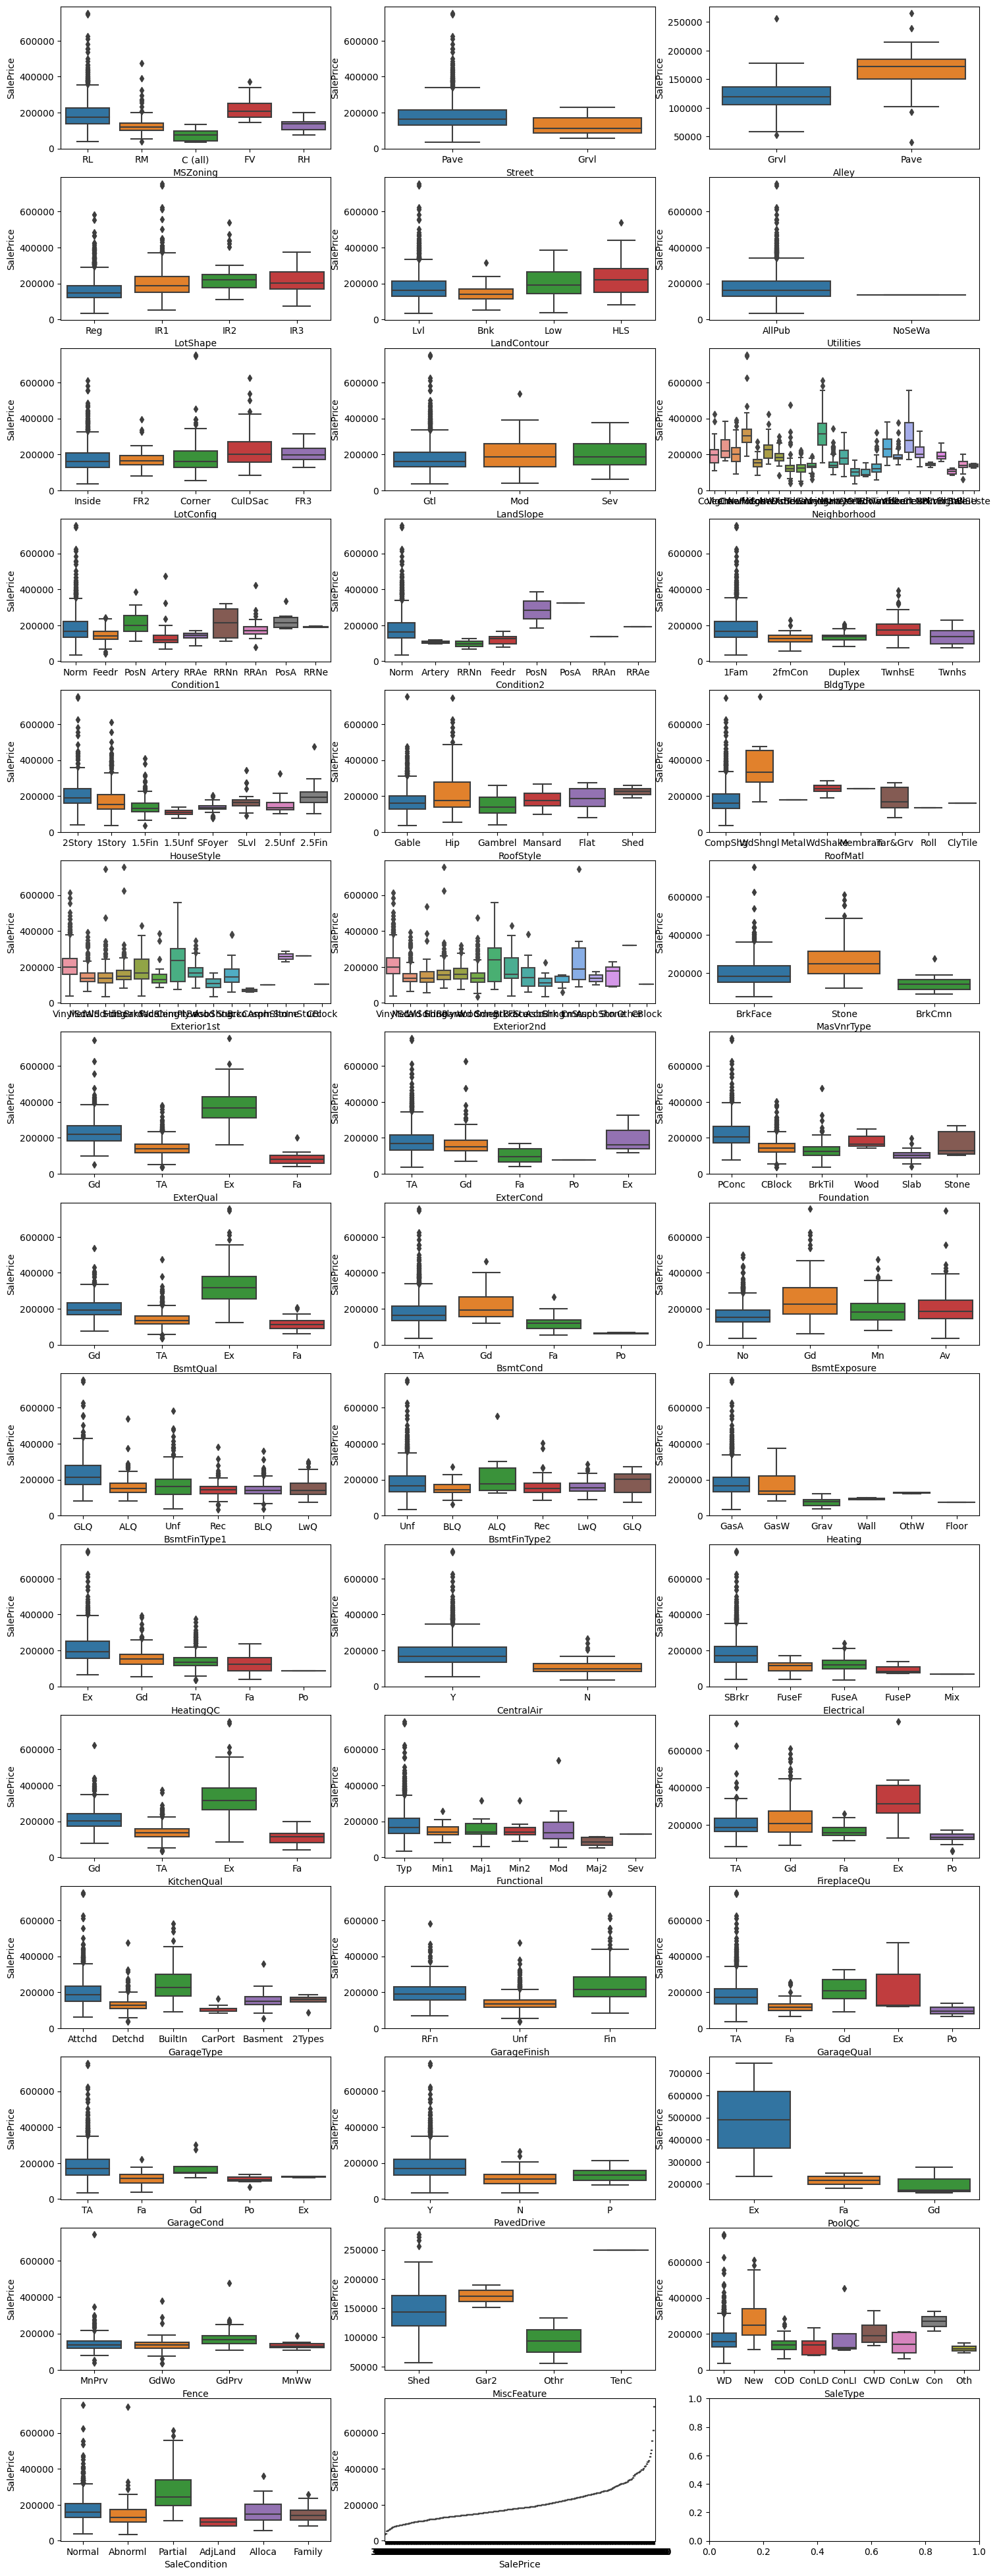

In [26]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in categorical_df_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x=col, y="SalePrice", data=categorical_df_train, ax=axes[i,j])
    else:
        sns.boxplot(x=col, y="SalePrice", data=categorical_df_train, ax=axes[i,j])
    j += 1

In [27]:
df_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'SalePrice'],
      dtype='object')

In [28]:
df_test.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence'],
      dtype='object')

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Data Preprocessing</h1>

# Data Cleaning

## 1. deleting duplicate values

In [29]:
print('number of duplicate values in numerical_df_train dataframe: ',numerical_df_train.duplicated().sum())
print('number of duplicate values in numerical_df_test dataframe: ',numerical_df_test.duplicated().sum())
print('number of duplicate values in categorical_df_train dataframe: ',categorical_df_train.duplicated().sum())
print('number of duplicate values in numerical_df_test dataframe: ',categorical_df_test.duplicated().sum())

number of duplicate values in numerical_df_train dataframe:  0
number of duplicate values in numerical_df_test dataframe:  0
number of duplicate values in categorical_df_train dataframe:  1
number of duplicate values in numerical_df_test dataframe:  14


In [30]:
#df_train.drop_duplicates(inplace=True)
#df_test.drop_duplicates(inplace=True)

In [31]:
# confirm changes
print('number of duplicate values in df_train dataframe: ',df_train.duplicated().sum())
print('number of duplicate values in df_test dataframe: ',df_test.duplicated().sum())

number of duplicate values in df_train dataframe:  0
number of duplicate values in df_test dataframe:  0


## 2. Missing values

<Axes: >

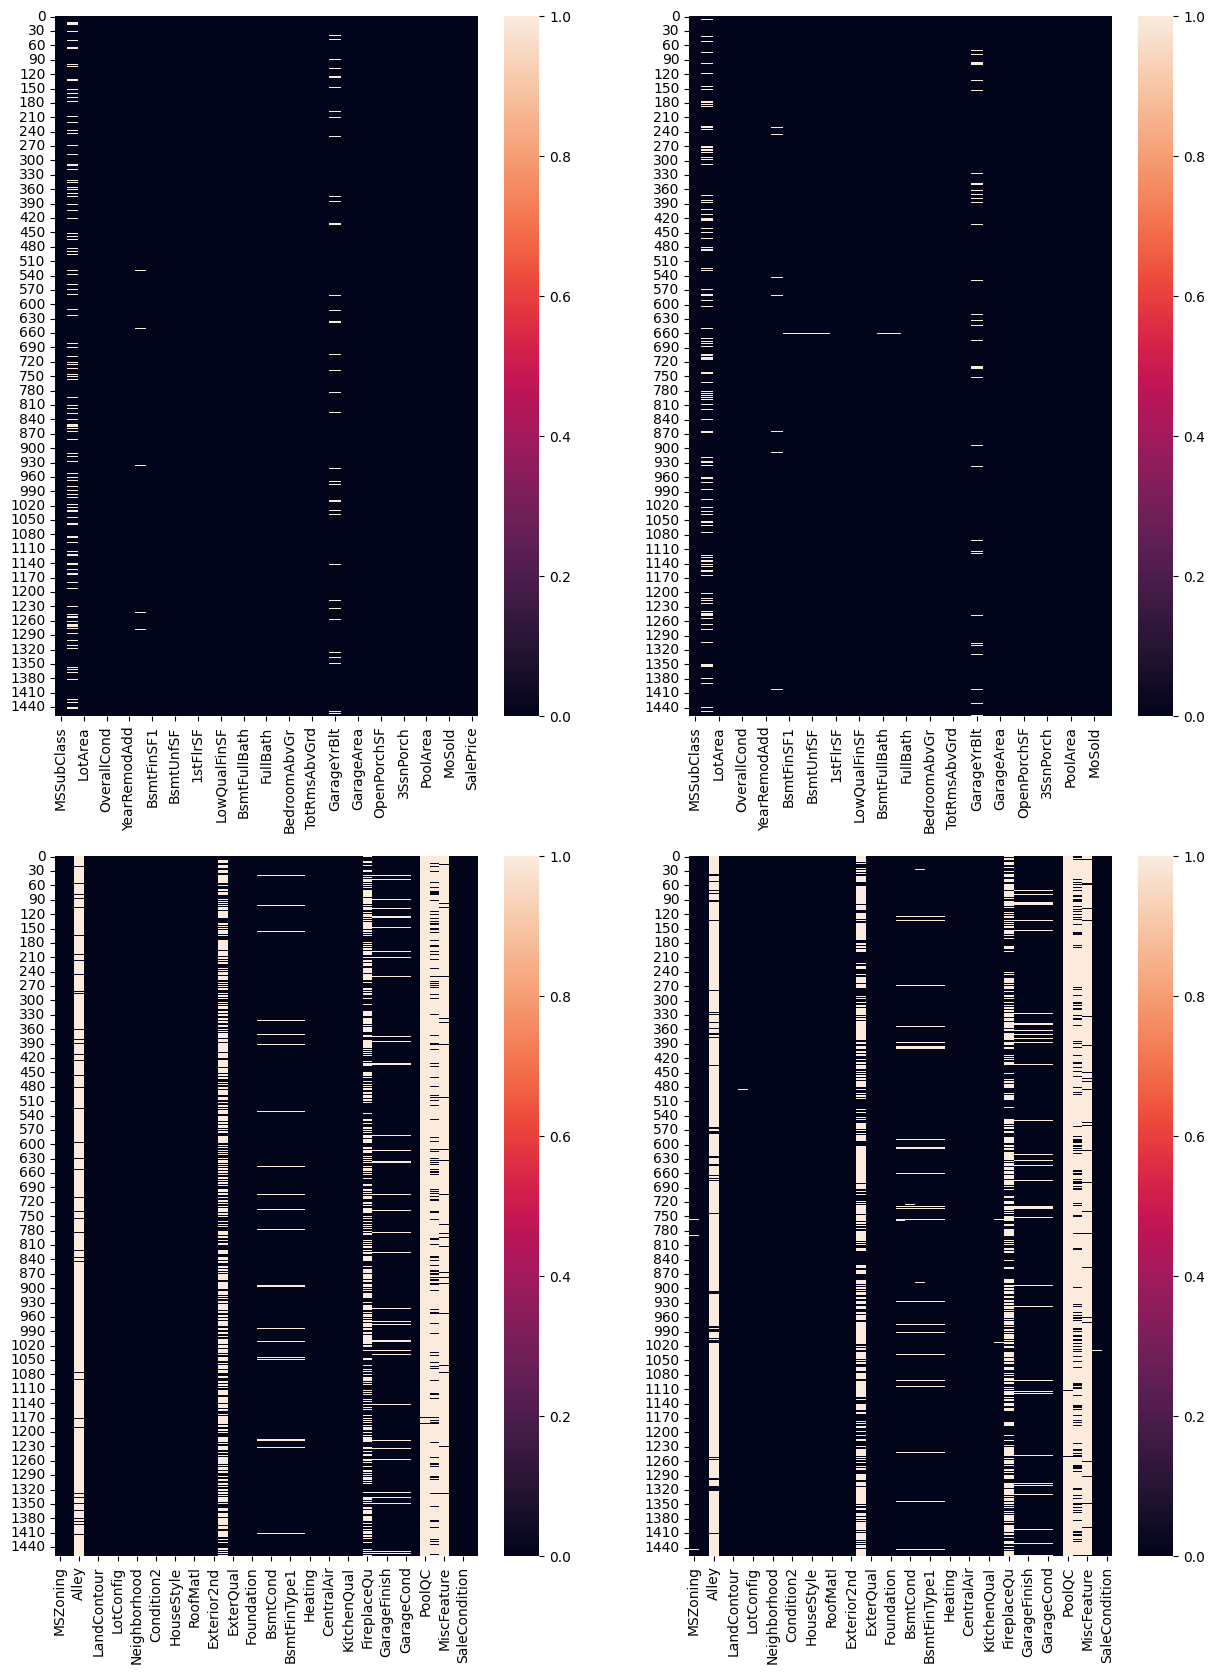

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15,20))
sns.heatmap(numerical_df_train.isnull(), ax=axes[0,0])
sns.heatmap(numerical_df_test.isnull(), ax=axes[0,1])
sns.heatmap(categorical_df_train.isnull(), ax=axes[1,0])
sns.heatmap(categorical_df_test.isnull(), ax=axes[1,1])

In [33]:
# drop columns with missing more than 30%
def drop_missing(df):
    i = 0
    for col in df:
        if (df[col].isnull().sum()/1460) > 0.3:
            df.drop(col, axis=1, inplace=True)
            print('column',col,'is dropped')
            i += 1
    if i == 0:
        print('no column dropped')

In [34]:
drop_missing(df_train)

column Alley is dropped
column MasVnrType is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped


In [35]:
drop_missing(df_test)

column Alley is dropped
column MasVnrType is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped


In [36]:
def fill_null(df):
    for col in df:
        if (col in numerical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mean(), inplace = True)
            print('fillna numerical column: ',col)
        if (col in categorical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print('fillna categorical column: ',col)

In [37]:
fill_null(df_train)

fillna numerical column:  LotFrontage
fillna numerical column:  MasVnrArea
fillna categorical column:  BsmtQual
fillna categorical column:  BsmtExposure
fillna categorical column:  BsmtFinType1
fillna categorical column:  GarageType
fillna numerical column:  GarageYrBlt
fillna categorical column:  GarageFinish


In [38]:
fill_null(df_test)

fillna categorical column:  MSZoning
fillna numerical column:  LotFrontage
fillna categorical column:  Exterior1st
fillna categorical column:  Exterior2nd
fillna numerical column:  MasVnrArea
fillna categorical column:  BsmtQual
fillna categorical column:  BsmtExposure
fillna categorical column:  BsmtFinType1
fillna numerical column:  BsmtFinSF1
fillna numerical column:  TotalBsmtSF
fillna categorical column:  KitchenQual
fillna categorical column:  GarageType
fillna numerical column:  GarageYrBlt
fillna categorical column:  GarageFinish
fillna numerical column:  GarageCars
fillna numerical column:  GarageArea


<Axes: >

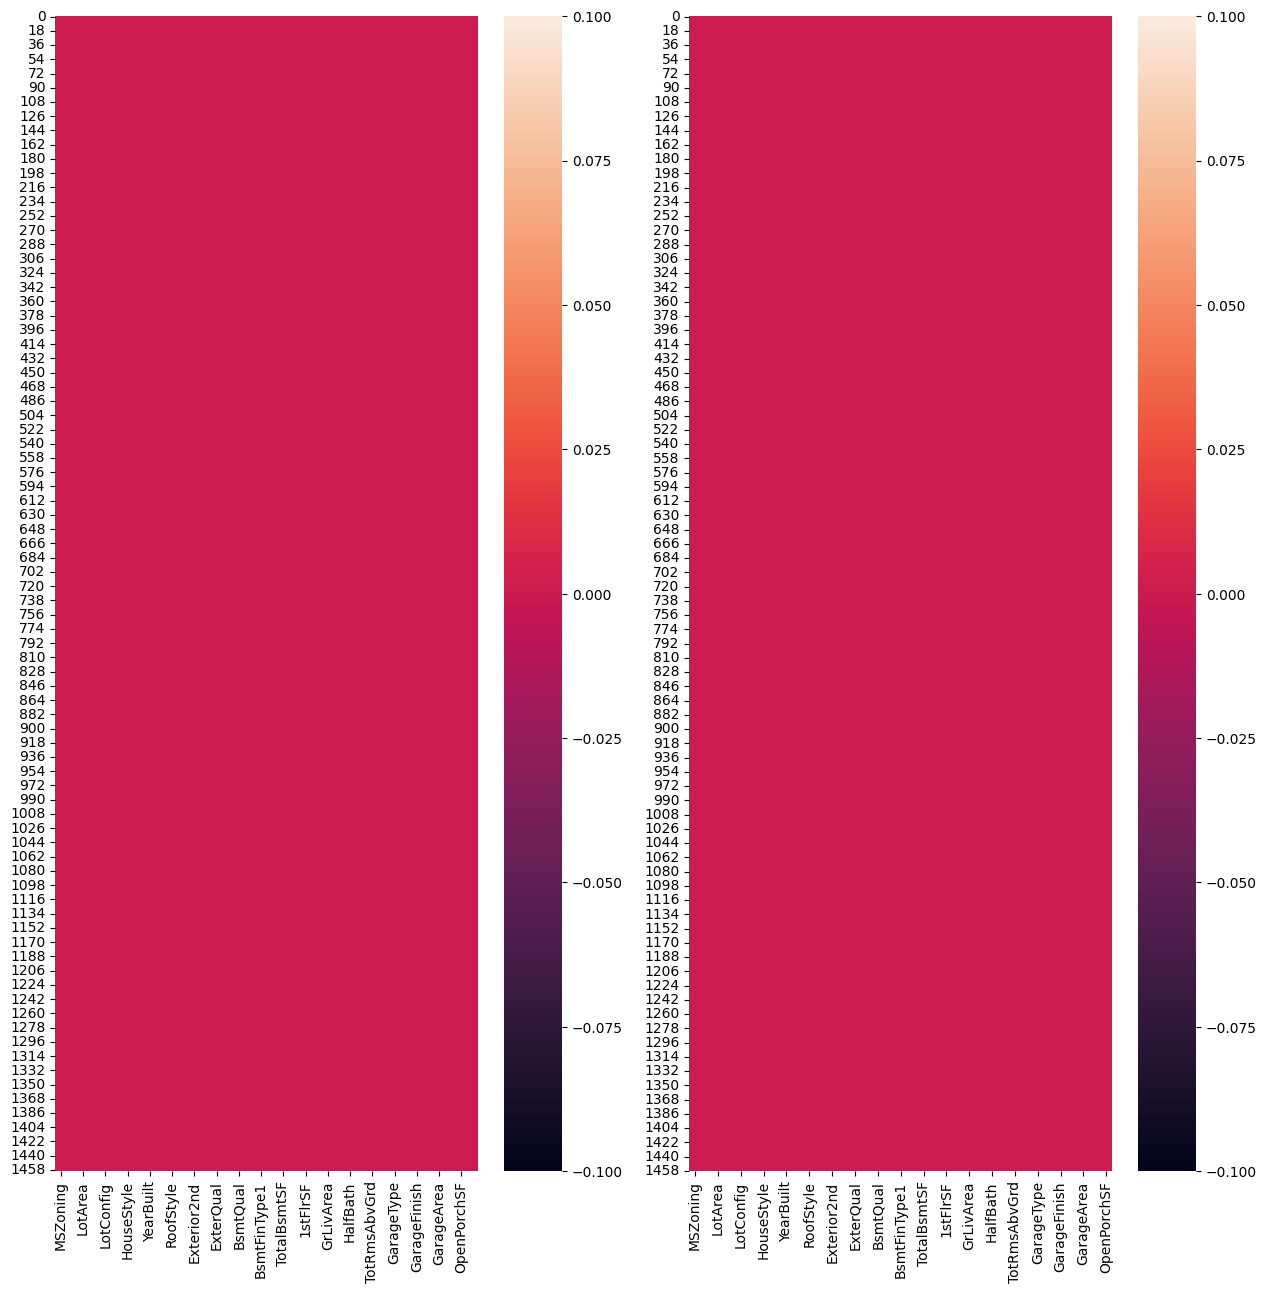

In [39]:
# confirm changes
fig, axes = plt.subplots(1, 2, figsize=(15,15))
sns.heatmap(df_train.isnull(), ax=axes[0])
sns.heatmap(df_test.isnull(), ax=axes[1])

## 3. Detect and remove outlires

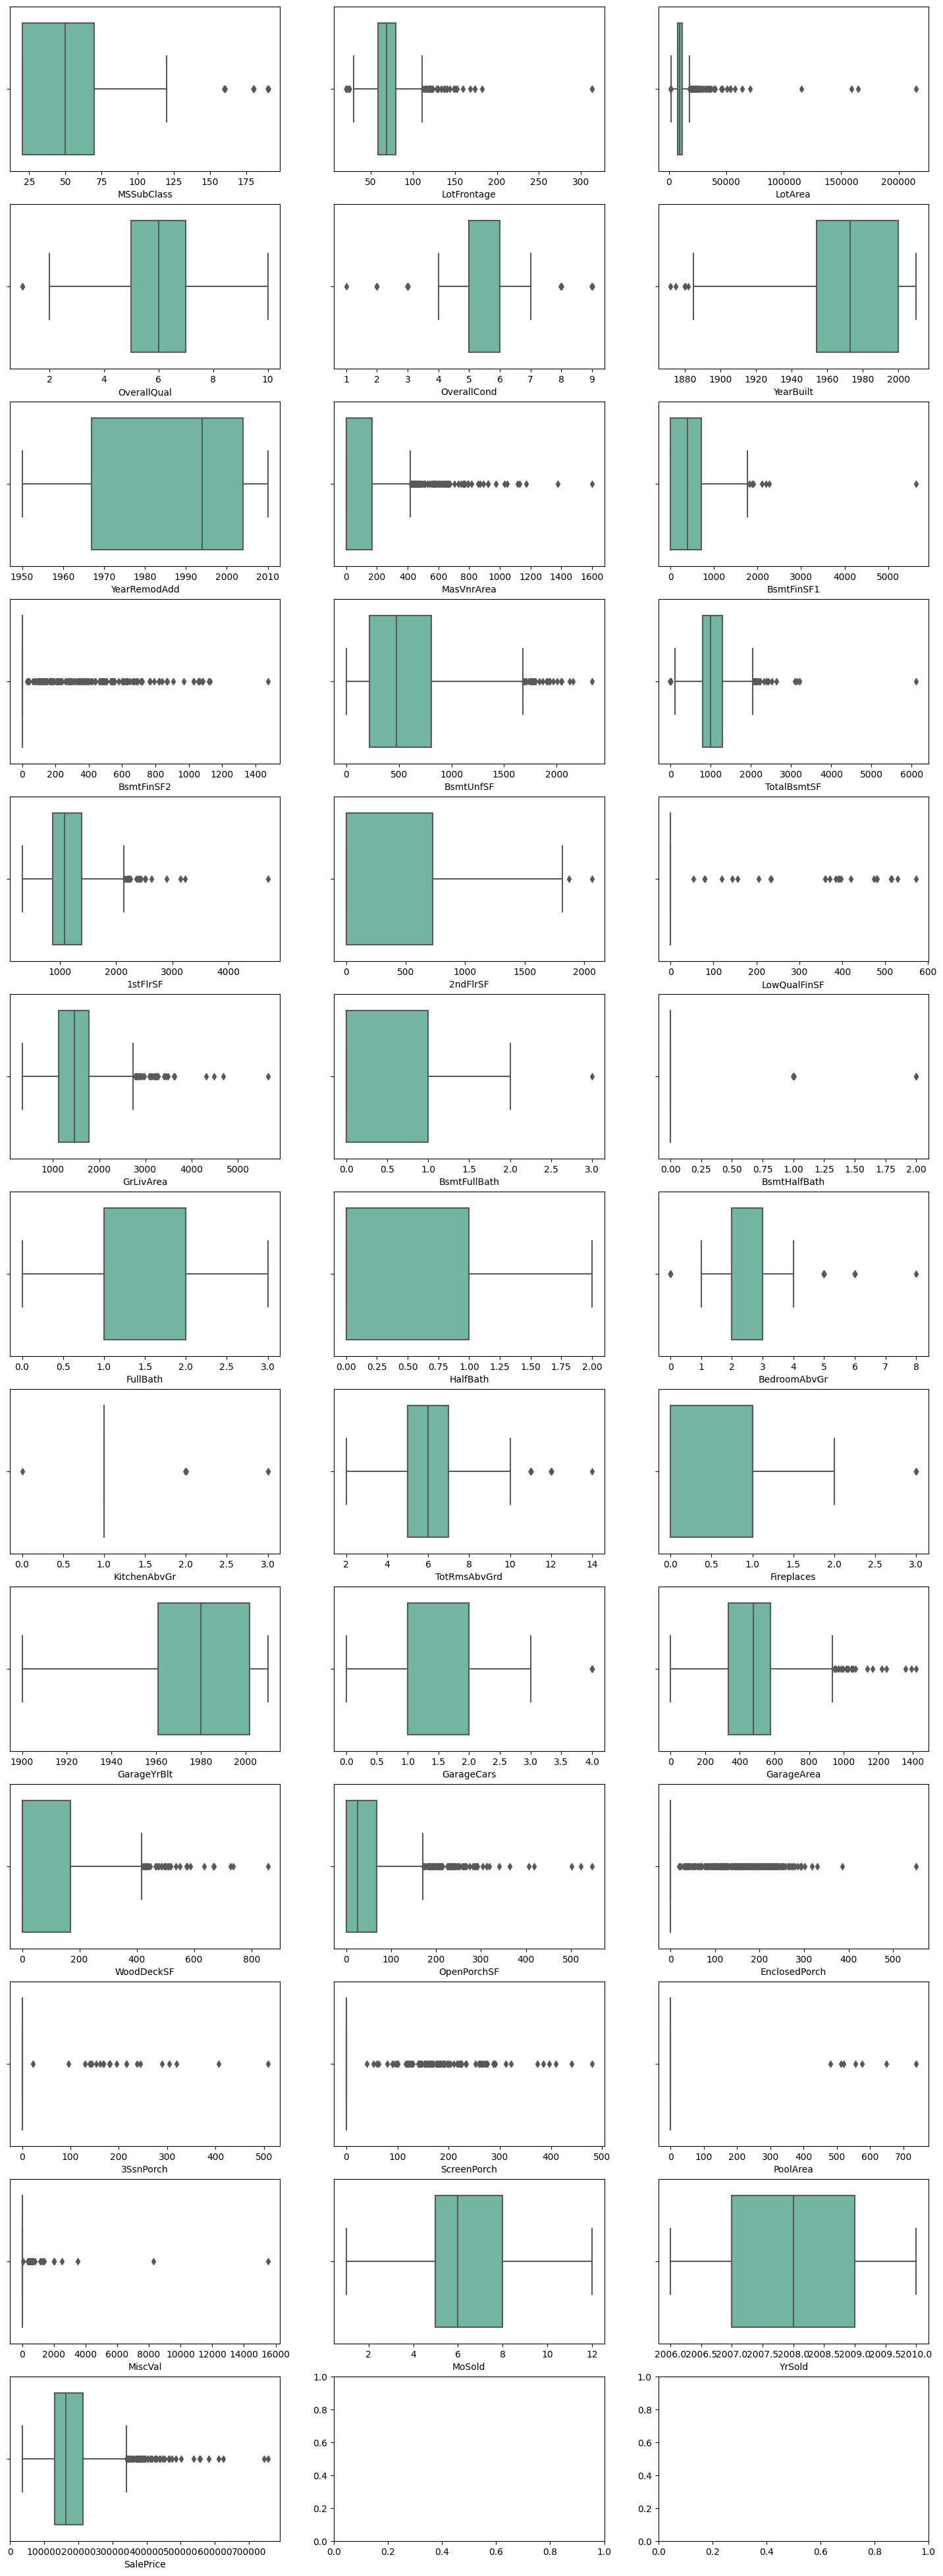

In [40]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in numerical_df_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x=numerical_df_train[col],data=numerical_df_train, palette="Set2", ax=axes[i,j])
    else:
        sns.boxplot(x=numerical_df_train[col],data=numerical_df_train, palette="Set2", ax=axes[i,j])
    j += 1

In [41]:
Q1 = np.percentile(df_train['SalePrice'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_train['SalePrice'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(df_train['SalePrice'] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(df_train['SalePrice'] <= (Q1-1.5*IQR))
# drop outlires
df_train.drop(upper[0], errors='ignore', inplace = True)
df_train.drop(lower[0], errors='ignore', inplace = True)

In [42]:
'''
def remove_outlires(df, columns_list):
    for col in columns_list:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        # Upper bound
        upper = np.where(df[col] >= (Q3+1.5*IQR))
        # lower bound
        lower = np.where(df[col] <= (Q1-1.5*IQR))
        # drop outlires
        df.drop(upper[0], errors='ignore', inplace = True)
        df.drop(lower[0], errors='ignore', inplace = True)
'''

"\ndef remove_outlires(df, columns_list):\n    for col in columns_list:\n        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')\n        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')\n        IQR = Q3 - Q1\n        # Upper bound\n        upper = np.where(df[col] >= (Q3+1.5*IQR))\n        # lower bound\n        lower = np.where(df[col] <= (Q1-1.5*IQR))\n        # drop outlires\n        df.drop(upper[0], errors='ignore', inplace = True)\n        df.drop(lower[0], errors='ignore', inplace = True)\n"

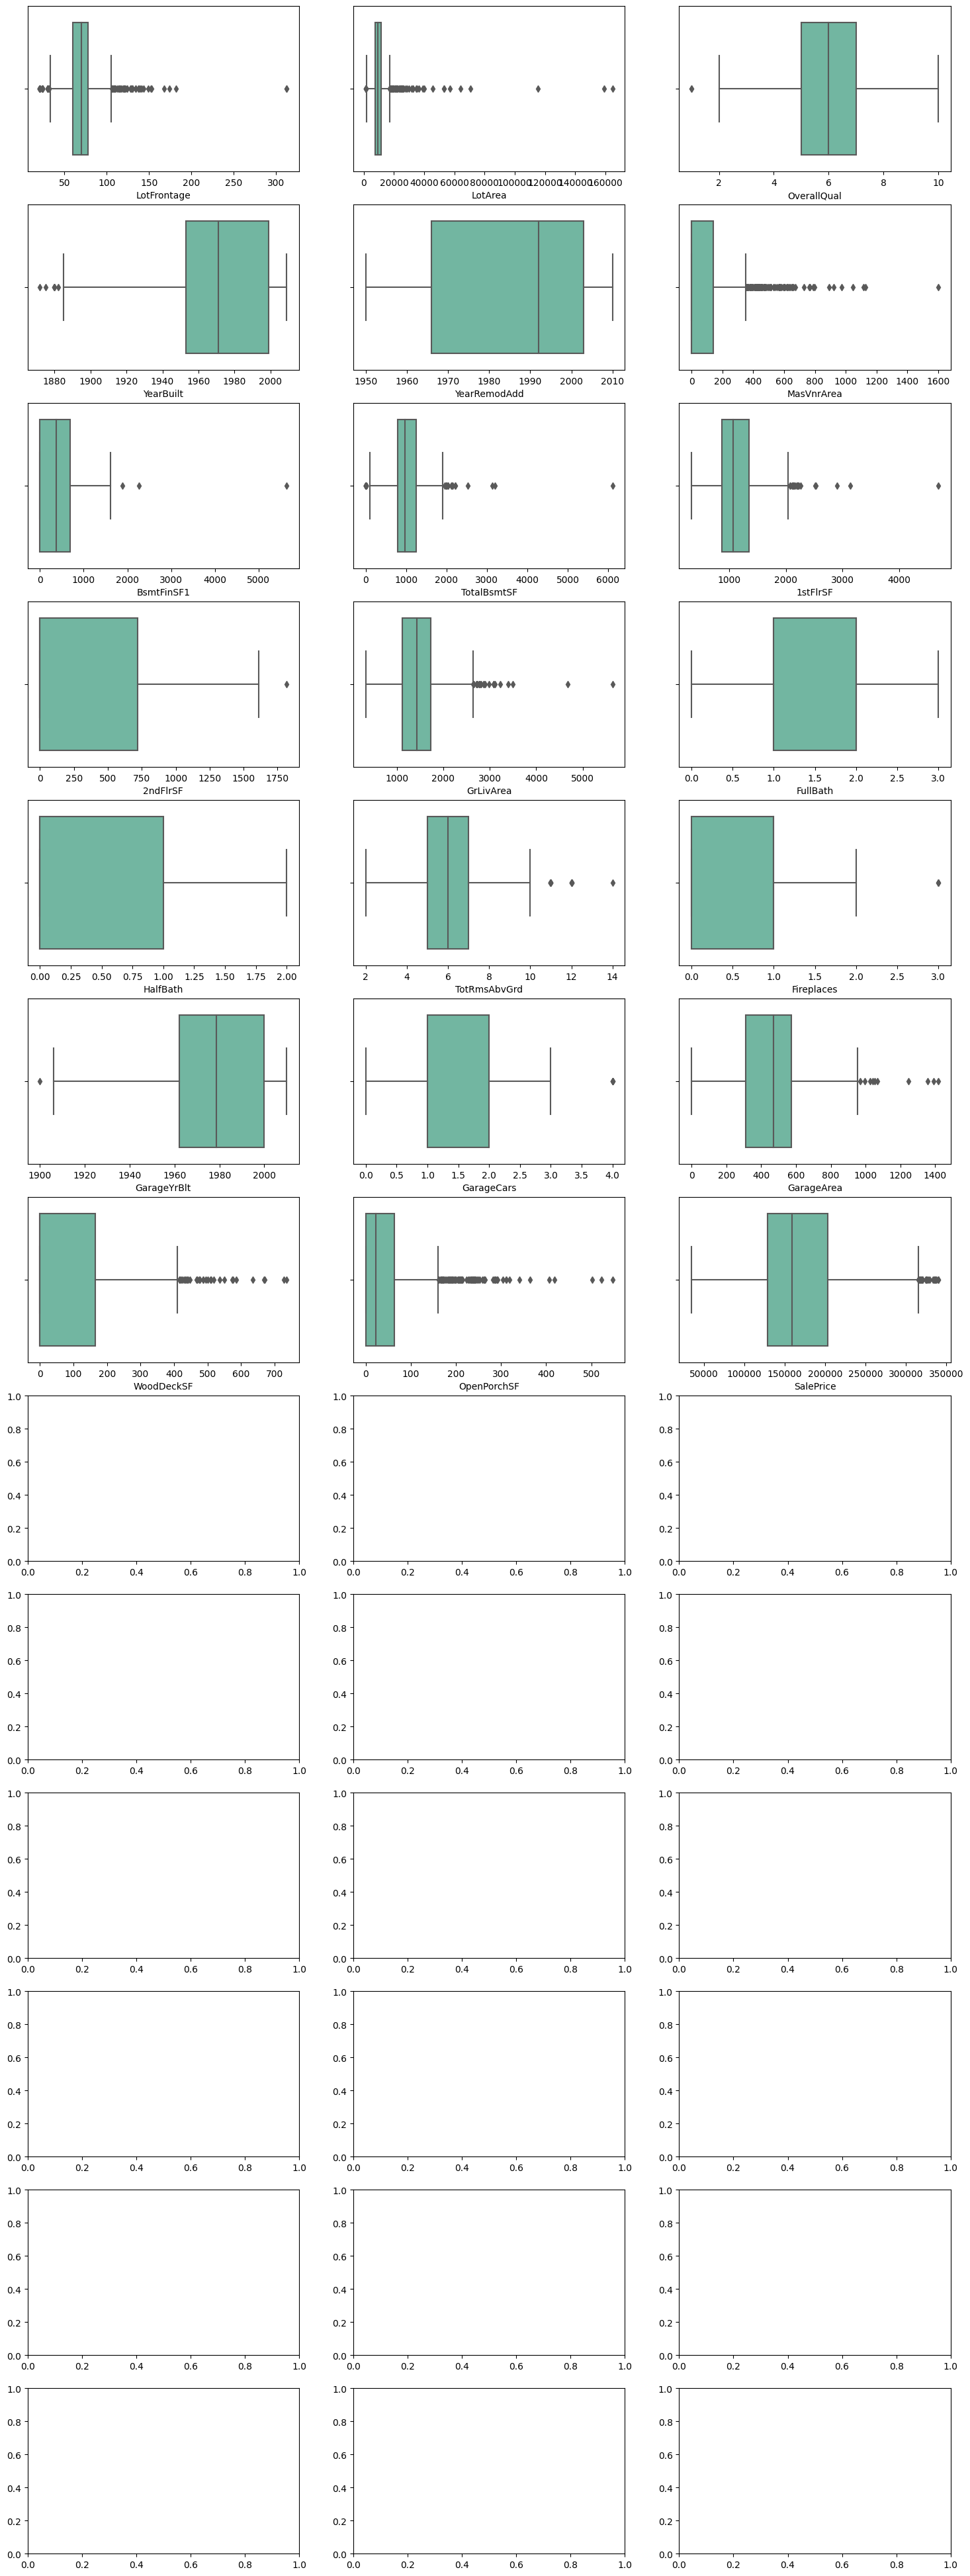

In [43]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train:
    if col in numerical_cols:
        if j==3:
            i += 1
            j = 0
            sns.boxplot(x=df_train[col],data=df_train, palette="Set2", ax=axes[i,j])
        else:
            sns.boxplot(x=df_train[col],data=df_train, palette="Set2", ax=axes[i,j])
        j += 1

# Converting categorical values to numerical

In [44]:
numerical_cols_new = []
categorical_cols_new = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numerical_cols_new.append(df_train[col].name)
    else:
        categorical_cols_new.append(df_train[col].name)

In [45]:
train_dummies = pd.get_dummies(df_train[categorical_cols_new], drop_first=True)
test_dummies = pd.get_dummies(df_test[categorical_cols_new], drop_first=True)

In [46]:
df_train.drop(categorical_cols_new, axis=1, inplace=True)
df_test.drop(categorical_cols_new, axis=1, inplace=True)

In [47]:
df_train = df_train.join(train_dummies)
df_test = df_test.join(test_dummies)

In [48]:
for col in df_train:
    if (col not in df_test.columns) & (col != 'SalePrice'):
        df_train.drop(col, axis=1, inplace=True)
        
for col in df_test:
    if col not in df_train.columns:
        df_test.drop(col, axis=1, inplace=True)

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Columns: 126 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(105), float64(3), int64(18)
memory usage: 416.2 KB


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 125 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(105), float64(7), int64(13)
memory usage: 377.7 KB


<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Preparing Data & Modeling</h1>

# Build Linear Regression Model

## Splitting the data into training and test sets 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# define response and explanatory variable.

# response variable
y = df_train['SalePrice']
# explanatory variable
X = df_train.drop('SalePrice', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## build model and fit data

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression()

## model prediction

In [56]:
y_pred = lmodel.predict(X_test)
y_pred

array([144130.70736507, 141835.35695698, 180231.32628889, 133367.7980021 ,
       142653.85065377, 285182.71168745, 202967.45088822, 172967.30109873,
       110287.57977055, 249115.27070735, 299421.16303456, 138652.47114841,
        77186.48237777, 255516.17375342, 212465.90282757, 197697.31523745,
       200501.97861794, 143574.45133733,  30950.05882902, 159874.06493187,
        87048.38241947, 201370.46646272, 279382.88760492, 155518.63897389,
       177744.27232246, 114606.33981567, 268058.06752748,  94318.23930087,
       127758.96677864, 122140.05478896, 214485.26053289, 277460.86787419,
       224631.57744491, 200717.7557738 , 141099.69421222, 142725.32945311,
       127902.39005571, 238296.59423925, 170425.36398662, 303053.8989301 ,
       232800.45834971,  83485.7334036 , 274889.8470156 , 134689.43086018,
       143509.75273619, 102917.07993176, 187380.08005252, 131567.6061692 ,
        99648.24883042, 109689.08078772, 133862.3072525 , 138375.70858707,
       179166.24899939, 1

In [57]:
y_test.values

array([140000, 145500, 163990, 140000, 120000, 337000, 210000, 145000,
       125000, 289000, 310000, 143000,  93000, 299800, 241000, 192000,
       175000,  97500,  73000, 153500,  40000, 192500, 277000, 128500,
       177000, 110000, 319900,  92900, 119000, 119500, 180000, 255500,
       240000, 224900, 169500, 162900, 145000, 236000, 175000, 335000,
       244000,  80000, 315000, 131000, 134432, 163500, 170000, 127000,
       110000, 110000, 153500, 144900, 225000, 144000, 245350, 151000,
       145000, 129000, 122000,  96500, 106000, 143900, 320000,  97000,
       175000, 239000, 262000, 241500, 118000, 159895, 186700, 107500,
       225000, 236500, 205000, 220000, 173900, 141000, 227000, 140000,
       172400, 197000, 152000, 137500, 205950, 133700, 138000, 148000,
       160000, 181900,  80000, 215000, 121600, 199900, 207000, 154300,
       108959, 140000, 165500, 195000, 110000, 184000, 128000, 225000,
       157900, 191000, 268000, 278000, 155000, 147000, 197900, 171750,
      

In [58]:
#########################################################################################################################################3

In [59]:
vars_list = X_test.columns.to_list()

In [60]:
X_test[0:1].values

array([[76.0, 7630, 5, 1900, 1996, 0.0, 0, 360, 1032, 780, 1812, 2, 0, 8,
        1, 1999.0, 2, 672, 344, 0, False, False, False, True, False,
        False, True, False, False, False, True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, True, False, False, False, False,
        False, False, False, False, False, False, True, False, False,
        True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, True, False, False, False, True, False, False,
        False, False, False, False, True, False, False, False, True,
        False, False, False, False, True, False, True, False, False,
        False, True, False, False, False, False, False, True, False,
        True]], dtype=object)

In [65]:
equation = f'({lmodel.intercept_})'

In [66]:
for i in range(len(lmodel.coef_)):
    equation = equation + ' + ' + f'({lmodel.coef_[i]})*x[{i}]'

In [67]:
equation

'(-197898.5074964817) + (-49.0642723718595)*x[0] + (0.20995410993111108)*x[1] + (9733.74734843757)*x[2] + (7.018512890424944)*x[3] + (193.89046128535196)*x[4] + (-5.70256764263727)*x[5] + (-1.5860246957501118)*x[6] + (3.98108216285668)*x[7] + (6.115402111209903)*x[8] + (25.275947208042112)*x[9] + (15.525906210204312)*x[10] + (3276.7056793747242)*x[11] + (1860.8416611667299)*x[12] + (1668.8471992394457)*x[13] + (6995.6222249358725)*x[14] + (-110.33610466939899)*x[15] + (5586.527660721738)*x[16] + (27.507762660607114)*x[17] + (21.971002218377635)*x[18] + (17.302979782511102)*x[19] + (31291.920193640413)*x[20] + (33258.48507919521)*x[21] + (37229.6738411142)*x[22] + (22642.976241564636)*x[23] + (3185.842289038227)*x[24] + (-63415.47606338537)*x[25] + (-1772.7298093539612)*x[26] + (6104.309584021568)*x[27] + (-10826.91643381635)*x[28] + (-11727.92134965061)*x[29] + (-969.9477572817523)*x[30] + (-2403.7764779948066)*x[31] + (8551.415628176555)*x[32] + (21209.32277162784)*x[33] + (19426.5601

In [ ]:
###################################################################################################################################################

## model evaluation

In [285]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [286]:
mean_absolute_error(y_test,y_pred)

16407.26134316893

In [287]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

21943.00881229348

In [288]:
# R^2
r2_score(y_test,y_pred)

0.8486251879441317

## predict test dataframe and submission

In [289]:
subm_preds = lmodel.predict(df_test)
subm_preds

array([126752.50401452, 160737.51602125, 177679.31023516, ...,
       161654.64948447,  91151.12629967, 204820.76006312])

In [226]:
submission = pd.DataFrame({
        "Id": id_test_list,
        "SalePrice": subm_preds})

In [227]:
submission.to_csv('submission.csv', index=False)